In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.eddy_feedback as ef 

In [2]:
# era5
ds_era5 = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/era5_data/era5daily_djf_epfluxes.nc', 
                       parallel=True, chunks={'time': 31})

rename_vars = {'latitude': 'lat', 'longitude':'lon'}
ds_era5 = ds_era5.rename(rename_vars)
ds_era5.level

<xarray.DataArray 'level' (level: 37)>
array([   1.,    2.,    3.,    5.,    7.,   10.,   20.,   30.,   50.,   70.,
        100.,  125.,  150.,  175.,  200.,  225.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  775.,  800.,  825.,
        850.,  875.,  900.,  925.,  950.,  975., 1000.])
Coordinates:
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Attributes:
    standard_name:  air_pressure
    long_name:      pressure_level
    units:          millibars
    positive:       down
    axis:           Z

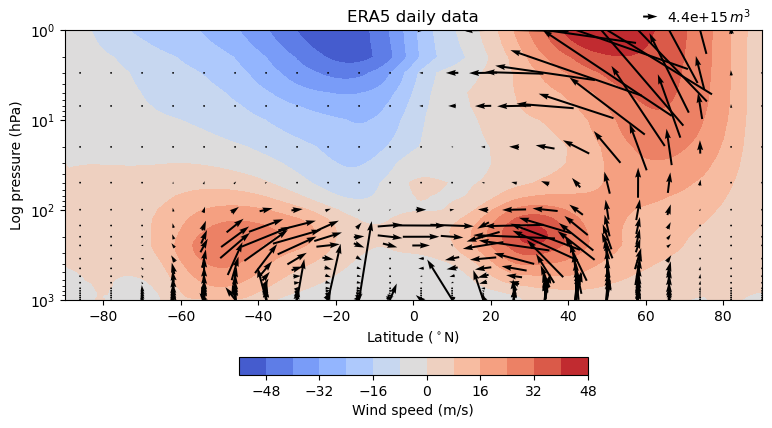

In [3]:
ef.nakamura_plot_DJF(ds_era5, label='ERA5')

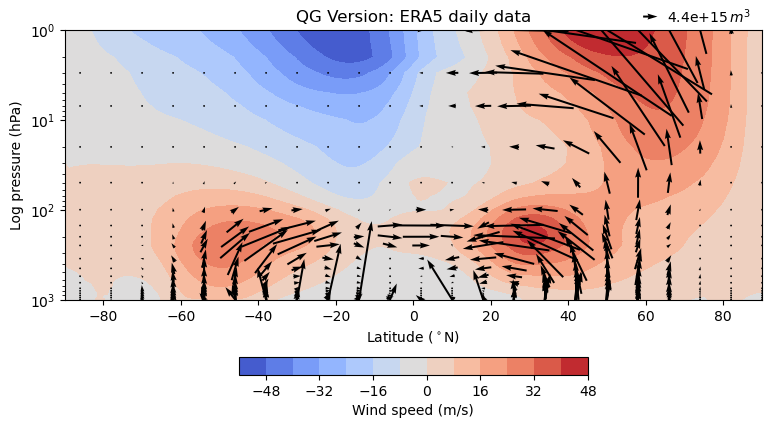

In [4]:
ef.nakamura_plot_DJF(ds_era5, label='QG Version: ERA5', do_ubar=False
                     )

In [5]:
# jra55
ds_jra55 = xr.open_dataset('/home/users/cturrell/documents/eddy_feedback/daily_datasets/jra55_djf_ep.nc')
ds_jra55.level

<xarray.DataArray 'level' (level: 37)>
array([   1.,    2.,    3.,    5.,    7.,   10.,   20.,   30.,   50.,   70.,
        100.,  125.,  150.,  175.,  200.,  225.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  775.,  800.,  825.,
        850.,  875.,  900.,  925.,  950.,  975., 1000.])
Coordinates:
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03

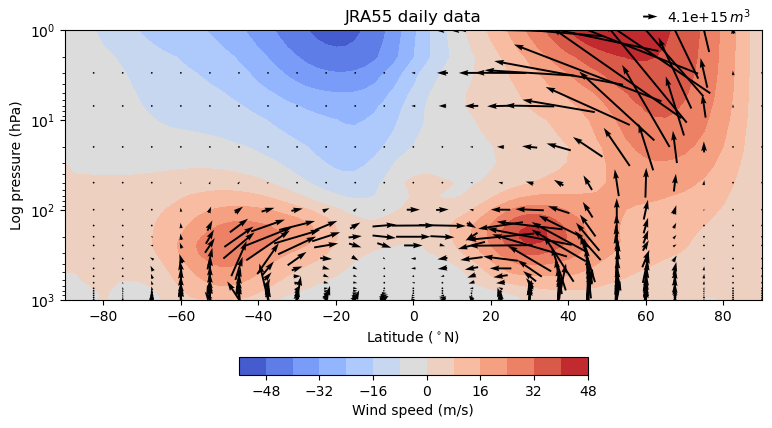

In [6]:
ef.nakamura_plot_DJF(ds_jra55, label='JRA55', skip_lat=3)